In [1]:
import pandas as pd
from numerai_automl.data_managers.data_loader import DataLoader
from numerai_automl.model_trainer.model_trainer import ModelTrainer
from numerai_automl.feature_neutralizer.feature_neutralizer import FeatureNeutralizer
from numerai_automl.scorer.scorer import Scorer
from numerai_automl.reporter import Reporter
from numerai_automl.utils.utils import save_model
import cloudpickle
from numerai_automl.config.config import LIGHTGBM_PARAMS_OPTION, FEATURE_SET_OPTION, TARGET_CANDIDATES

In [2]:
data_loader = DataLoader(data_version="v5.0",feature_set="small") # change this to False if you already have the data

targets_list = TARGET_CANDIDATES
lightgbm_params = LIGHTGBM_PARAMS_OPTION
feature_set = FEATURE_SET_OPTION

# Load data
train = data_loader.load_train_data( target_set=targets_list, downsample_step=4)
validation = data_loader.load_validation_data( target_set=targets_list, downsample_step=4)
    

In [3]:
import os
print(os.getcwd())


/Users/fantasy2fry/Documents/informatyczne/iadstudia/automl/AUTOFUND


In [4]:
feature_cols = train.columns.tolist()
feature_cols.remove("era")
for target in targets_list:
    feature_cols.remove(target)

In [5]:
X_train = train[feature_cols]
y_train_list = train[targets_list]
y_train_main_target=train["target"]

X_val = validation[feature_cols]
y_val = validation[["target"]]

# Initialize and train models with different parameter options
trainer = ModelTrainer(params=lightgbm_params)


models = {}
for i, target in enumerate(targets_list, start=1):
    model_path = f"models/model_{target}.pkl"

    # Check if model exists
    try:
        with open(model_path, 'rb') as f:
            model = cloudpickle.load(f)
            print(f"Loading existing model for {target}")
    except (FileNotFoundError, EOFError):
        print(f"Training new model for {target}")
        model = trainer.train(X_train, y_train_list[target])
        save_model(model, model_path)

    models[f"model_{target}"] = model

# Feature Neutralization
# neutralizer = FeatureNeutralizer(neutralizer_features=feature_cols, proportion=1.0)
predictions = {}
for name, model in models.items():
    predictions_path = f"predictions/{name}_preds.pkl"

    # Check if predictions exist
    try:
        with open(predictions_path, 'rb') as f:
            model_predictions = cloudpickle.load(f)
            print(f"Loading existing predictions for {name}")
            predictions[name] = model_predictions
    except (FileNotFoundError, EOFError):
        print(f"Generating new predictions for {name}")
        predictions[name] = model.predict(X_val)

        with open(predictions_path, 'wb') as f:
            cloudpickle.dump(predictions[name], f)

predictions = pd.DataFrame(predictions)

Loading existing model for target_agnes_20
Loading existing model for target_agnes_60
Loading existing model for target_alpha_20
Loading existing model for target_alpha_60
Loading existing model for target_bravo_20
Loading existing model for target_bravo_60
Loading existing model for target_caroline_20
Loading existing model for target_caroline_60
Loading existing model for target_charlie_20
Loading existing model for target_charlie_60
Loading existing model for target_claudia_20
Loading existing model for target_claudia_60
Loading existing model for target
Loading existing model for target_cyrusd_60
Loading existing model for target_delta_20
Loading existing model for target_delta_60
Loading existing model for target_echo_20
Loading existing model for target_echo_60
Loading existing model for target_jeremy_20
Loading existing model for target_jeremy_60
Loading existing model for target_ralph_20
Loading existing model for target_ralph_60
Loading existing model for target_rowan_20
Loadi

In [6]:
predictions

,model_target_agnes_20,model_target_agnes_60,model_target_alpha_20,model_target_alpha_60,model_target_bravo_20,model_target_bravo_60,model_target_caroline_20,model_target_caroline_60,model_target_charlie_20,model_target_charlie_60,...,model_target_teager2b_20,model_target_teager2b_60,model_target_tyler_20,model_target_tyler_60,model_target_victor_20,model_target_victor_60,model_target_waldo_20,model_target_waldo_60,model_target_xerxes_20,model_target_xerxes_60
0,0.487895,0.490512,0.494008,0.497398,0.486867,0.489858,0.487869,0.493054,0.492884,0.499746,...,0.494118,0.494118,0.488531,0.493525,0.488738,0.494145,0.490861,0.494342,0.489671,0.494633
1,0.507255,0.510912,0.501719,0.503009,0.508261,0.516859,0.499162,0.502523,0.503574,0.504264,...,0.504674,0.507364,0.501236,0.504689,0.502293,0.503082,0.501742,0.502089,0.500130,0.502540
2,0.486158,0.485640,0.501899,0.498721,0.495044,0.495835,0.500243,0.495266,0.498836,0.500184,...,0.499772,0.496431,0.496435,0.500612,0.502258,0.500922,0.497073,0.497574,0.498899,0.495525
3,0.512101,0.519444,0.512201,0.512194,0.514491,0.519862,0.514119,0.517307,0.512171,0.513346,...,0.502661,0.500275,0.514032,0.517377,0.517990,0.522126,0.515918,0.520649,0.510793,0.515675
4,0.524481,0.533430,0.504567,0.504748,0.512469,0.520614,0.506757,0.513296,0.503943,0.507971,...,0.505932,0.509380,0.514238,0.517452,0.504131,0.511063,0.511033,0.519095,0.508833,0.512609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883779,0.495854,0.494388,0.497026,0.496878,0.492956,0.488774,0.494649,0.495721,0.498915,0.496690,...,0.500768,0.505733,0.502641,0.501419,0.496535,0.499603,0.498468,0.500396,0.496797,0.496543
883780,0.497733,0.486766,0.497490,0.496036,0.494498,0.484032,0.499378,0.494464,0.501345,0.496529,...,0.496880,0.492979,0.495074,0.487324,0.497921,0.493368,0.495988,0.490829,0.501405,0.496495
883781,0.495618,0.496152,0.490599,0.487516,0.486735,0.482265,0.491128,0.486657,0.490611,0.488599,...,0.491220,0.486522,0.487421,0.483673,0.487875,0.481132,0.487969,0.482213,0.491018,0.488763
883782,0.483801,0.486760,0.493995,0.495211,0.492915,0.495395,0.491177,0.493814,0.493243,0.498159,...,0.494224,0.491603,0.489969,0.488221,0.488877,0.488735,0.490937,0.492043,0.493206,0.491987


In [7]:
predictions_train={}

for name, model in models.items():
    predictions_path = f"predictions_train/{name}_preds.pkl"

    # Check if predictions exist
    try:
        with open(predictions_path, 'rb') as f:
            model_predictions_train = cloudpickle.load(f)
            print(f"Loading existing predictions for {name}")
            predictions_train[name] = model_predictions_train
    except (FileNotFoundError, EOFError):
        print(f"Generating new train predictions for {name}")
        predictions_train[name] = model.predict(X_train)

        with open(predictions_path, 'wb') as f:
            cloudpickle.dump(predictions_train[name], f)
            
predictions_train=pd.DataFrame(predictions_train)

Loading existing predictions for model_target_agnes_20
Loading existing predictions for model_target_agnes_60
Loading existing predictions for model_target_alpha_20
Loading existing predictions for model_target_alpha_60
Loading existing predictions for model_target_bravo_20
Loading existing predictions for model_target_bravo_60
Loading existing predictions for model_target_caroline_20
Loading existing predictions for model_target_caroline_60
Loading existing predictions for model_target_charlie_20
Loading existing predictions for model_target_charlie_60
Loading existing predictions for model_target_claudia_20
Loading existing predictions for model_target_claudia_60
Loading existing predictions for model_target
Loading existing predictions for model_target_cyrusd_60
Loading existing predictions for model_target_delta_20
Loading existing predictions for model_target_delta_60
Loading existing predictions for model_target_echo_20
Loading existing predictions for model_target_echo_60
Loadin

In [8]:
predictions_train

,model_target_agnes_20,model_target_agnes_60,model_target_alpha_20,model_target_alpha_60,model_target_bravo_20,model_target_bravo_60,model_target_caroline_20,model_target_caroline_60,model_target_charlie_20,model_target_charlie_60,...,model_target_teager2b_20,model_target_teager2b_60,model_target_tyler_20,model_target_tyler_60,model_target_victor_20,model_target_victor_60,model_target_waldo_20,model_target_waldo_60,model_target_xerxes_20,model_target_xerxes_60
0,0.504559,0.502808,0.502123,0.500011,0.497361,0.491634,0.500043,0.498040,0.500615,0.497593,...,0.499941,0.497682,0.502593,0.500937,0.500315,0.495978,0.504455,0.501484,0.502106,0.498953
1,0.500855,0.505558,0.499495,0.497204,0.503850,0.503085,0.498634,0.500983,0.500012,0.497870,...,0.499534,0.500434,0.500710,0.504078,0.499857,0.501858,0.503299,0.508235,0.500518,0.502980
2,0.501076,0.501564,0.500226,0.502697,0.498251,0.497460,0.501186,0.501842,0.500725,0.500266,...,0.504214,0.503109,0.502011,0.501211,0.500581,0.499502,0.502347,0.503262,0.501048,0.499012
3,0.485153,0.485302,0.497527,0.498613,0.492390,0.492338,0.491022,0.493946,0.496656,0.500351,...,0.495603,0.495381,0.492804,0.493449,0.493455,0.494184,0.490033,0.492240,0.490042,0.493645
4,0.513061,0.522679,0.502378,0.499222,0.510048,0.506322,0.500920,0.499849,0.502320,0.501668,...,0.501459,0.501847,0.504675,0.504332,0.502100,0.501984,0.502677,0.503818,0.503267,0.502391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688179,0.510129,0.518337,0.500804,0.506495,0.509064,0.518236,0.502315,0.507668,0.501118,0.505776,...,0.505667,0.513609,0.501713,0.514500,0.503514,0.512994,0.504094,0.510752,0.504151,0.510369
688180,0.501050,0.496329,0.496301,0.494393,0.497694,0.496817,0.491472,0.492066,0.495059,0.496220,...,0.495671,0.495500,0.497988,0.494055,0.494098,0.496276,0.494752,0.494159,0.491186,0.492353
688181,0.496204,0.497550,0.503400,0.502892,0.501549,0.497855,0.503585,0.499345,0.503050,0.500186,...,0.505503,0.498903,0.501709,0.504364,0.505839,0.505645,0.501502,0.501462,0.500418,0.500598
688182,0.505495,0.499286,0.499113,0.498791,0.503730,0.501166,0.498199,0.495506,0.499404,0.499595,...,0.501340,0.498126,0.503705,0.503564,0.501621,0.498836,0.502176,0.500422,0.499810,0.497458


In [9]:
# create model based on predictions train to predict main target
#lightgbm create
import lightgbm as lgb

main_model = lgb.LGBMRegressor(**lightgbm_params)
main_model.fit(predictions_train, y_train_main_target)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9180
[LightGBM] [Info] Number of data points in the train set: 688184, number of used features: 36
[LightGBM] [Info] Start training from score 0.500008


/Users/fantasy2fry/Documents/informatyczne/iadstudia/automl/AUTOFUND/.venv/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMRegressor(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
              n_estimators=2000, n_jobs=-1, num_leaves=15)

In [10]:
# compare y_train_main_target and main_model.predict(predictions_train) using different metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_train_main_target = main_model.predict(predictions_train)
mse=mean_squared_error(y_train_main_target, y_predict_train_main_target)
mae=mean_absolute_error(y_train_main_target, y_predict_train_main_target)
r2=r2_score(y_train_main_target, y_predict_train_main_target)

print(f"mse: {mse}, mae: {mae}, r2: {r2}")

mse: 0.04914959299976277, mae: 0.15511104387961724, r2: 0.012963158659015317


In [11]:
#compare y_val and main_model.predict(predictions) in table as Dataframe:
pd.DataFrame({"y_val": y_train_main_target, "y_predict": y_predict_train_main_target})

,y_val,y_predict
id,,
n0007b5abb0c3a25,0.25,0.505012
n003bba8a98662e4,0.25,0.495495
n003bee128c2fcfc,0.75,0.506719
n0048ac83aff7194,0.25,0.471753
n0055a2401ba6480,0.25,0.502501
...,...,...
nffc2d5e4b79a7ae,0.00,0.502047
nffc9844c1c7a6a9,0.25,0.467767
nffd79773f4109bb,0.50,0.504578


<Axes: xlabel='target'>

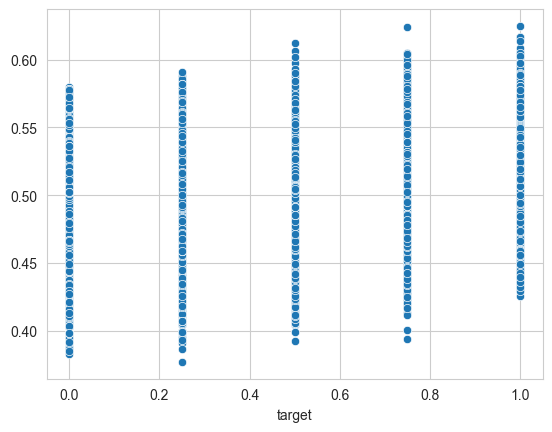

In [12]:
import seaborn as sns

sns.scatterplot(x=y_train_main_target, y=y_predict_train_main_target)

In [13]:
# correlation beetween main target and predictions_train
y_train_main_target

id
n0007b5abb0c3a25    0.25
n003bba8a98662e4    0.25
n003bee128c2fcfc    0.75
n0048ac83aff7194    0.25
n0055a2401ba6480    0.25
                    ... 
nffc2d5e4b79a7ae    0.00
nffc9844c1c7a6a9    0.25
nffd79773f4109bb    0.50
nfff6ab9d6dc0b32    0.25
nfff87b21e4db902    0.50
Name: target, Length: 688184, dtype: float32

In [14]:
predictions_train

,model_target_agnes_20,model_target_agnes_60,model_target_alpha_20,model_target_alpha_60,model_target_bravo_20,model_target_bravo_60,model_target_caroline_20,model_target_caroline_60,model_target_charlie_20,model_target_charlie_60,...,model_target_teager2b_20,model_target_teager2b_60,model_target_tyler_20,model_target_tyler_60,model_target_victor_20,model_target_victor_60,model_target_waldo_20,model_target_waldo_60,model_target_xerxes_20,model_target_xerxes_60
0,0.504559,0.502808,0.502123,0.500011,0.497361,0.491634,0.500043,0.498040,0.500615,0.497593,...,0.499941,0.497682,0.502593,0.500937,0.500315,0.495978,0.504455,0.501484,0.502106,0.498953
1,0.500855,0.505558,0.499495,0.497204,0.503850,0.503085,0.498634,0.500983,0.500012,0.497870,...,0.499534,0.500434,0.500710,0.504078,0.499857,0.501858,0.503299,0.508235,0.500518,0.502980
2,0.501076,0.501564,0.500226,0.502697,0.498251,0.497460,0.501186,0.501842,0.500725,0.500266,...,0.504214,0.503109,0.502011,0.501211,0.500581,0.499502,0.502347,0.503262,0.501048,0.499012
3,0.485153,0.485302,0.497527,0.498613,0.492390,0.492338,0.491022,0.493946,0.496656,0.500351,...,0.495603,0.495381,0.492804,0.493449,0.493455,0.494184,0.490033,0.492240,0.490042,0.493645
4,0.513061,0.522679,0.502378,0.499222,0.510048,0.506322,0.500920,0.499849,0.502320,0.501668,...,0.501459,0.501847,0.504675,0.504332,0.502100,0.501984,0.502677,0.503818,0.503267,0.502391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688179,0.510129,0.518337,0.500804,0.506495,0.509064,0.518236,0.502315,0.507668,0.501118,0.505776,...,0.505667,0.513609,0.501713,0.514500,0.503514,0.512994,0.504094,0.510752,0.504151,0.510369
688180,0.501050,0.496329,0.496301,0.494393,0.497694,0.496817,0.491472,0.492066,0.495059,0.496220,...,0.495671,0.495500,0.497988,0.494055,0.494098,0.496276,0.494752,0.494159,0.491186,0.492353
688181,0.496204,0.497550,0.503400,0.502892,0.501549,0.497855,0.503585,0.499345,0.503050,0.500186,...,0.505503,0.498903,0.501709,0.504364,0.505839,0.505645,0.501502,0.501462,0.500418,0.500598
688182,0.505495,0.499286,0.499113,0.498791,0.503730,0.501166,0.498199,0.495506,0.499404,0.499595,...,0.501340,0.498126,0.503705,0.503564,0.501621,0.498836,0.502176,0.500422,0.499810,0.497458


In [15]:
#create two dataframe adding new column with main target
df_main=pd.DataFrame(predictions_train).copy()
#add y_train_main_target to df_main as new columns
df_main["main_target"]=y_train_main_target.tolist()
df_main

,model_target_agnes_20,model_target_agnes_60,model_target_alpha_20,model_target_alpha_60,model_target_bravo_20,model_target_bravo_60,model_target_caroline_20,model_target_caroline_60,model_target_charlie_20,model_target_charlie_60,...,model_target_teager2b_60,model_target_tyler_20,model_target_tyler_60,model_target_victor_20,model_target_victor_60,model_target_waldo_20,model_target_waldo_60,model_target_xerxes_20,model_target_xerxes_60,main_target
0,0.504559,0.502808,0.502123,0.500011,0.497361,0.491634,0.500043,0.498040,0.500615,0.497593,...,0.497682,0.502593,0.500937,0.500315,0.495978,0.504455,0.501484,0.502106,0.498953,0.25
1,0.500855,0.505558,0.499495,0.497204,0.503850,0.503085,0.498634,0.500983,0.500012,0.497870,...,0.500434,0.500710,0.504078,0.499857,0.501858,0.503299,0.508235,0.500518,0.502980,0.25
2,0.501076,0.501564,0.500226,0.502697,0.498251,0.497460,0.501186,0.501842,0.500725,0.500266,...,0.503109,0.502011,0.501211,0.500581,0.499502,0.502347,0.503262,0.501048,0.499012,0.75
3,0.485153,0.485302,0.497527,0.498613,0.492390,0.492338,0.491022,0.493946,0.496656,0.500351,...,0.495381,0.492804,0.493449,0.493455,0.494184,0.490033,0.492240,0.490042,0.493645,0.25
4,0.513061,0.522679,0.502378,0.499222,0.510048,0.506322,0.500920,0.499849,0.502320,0.501668,...,0.501847,0.504675,0.504332,0.502100,0.501984,0.502677,0.503818,0.503267,0.502391,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688179,0.510129,0.518337,0.500804,0.506495,0.509064,0.518236,0.502315,0.507668,0.501118,0.505776,...,0.513609,0.501713,0.514500,0.503514,0.512994,0.504094,0.510752,0.504151,0.510369,0.00
688180,0.501050,0.496329,0.496301,0.494393,0.497694,0.496817,0.491472,0.492066,0.495059,0.496220,...,0.495500,0.497988,0.494055,0.494098,0.496276,0.494752,0.494159,0.491186,0.492353,0.25
688181,0.496204,0.497550,0.503400,0.502892,0.501549,0.497855,0.503585,0.499345,0.503050,0.500186,...,0.498903,0.501709,0.504364,0.505839,0.505645,0.501502,0.501462,0.500418,0.500598,0.50
688182,0.505495,0.499286,0.499113,0.498791,0.503730,0.501166,0.498199,0.495506,0.499404,0.499595,...,0.498126,0.503705,0.503564,0.501621,0.498836,0.502176,0.500422,0.499810,0.497458,0.25


In [16]:
#correlation matrix
df_main.corr()

,model_target_agnes_20,model_target_agnes_60,model_target_alpha_20,model_target_alpha_60,model_target_bravo_20,model_target_bravo_60,model_target_caroline_20,model_target_caroline_60,model_target_charlie_20,model_target_charlie_60,...,model_target_teager2b_60,model_target_tyler_20,model_target_tyler_60,model_target_victor_20,model_target_victor_60,model_target_waldo_20,model_target_waldo_60,model_target_xerxes_20,model_target_xerxes_60,main_target
model_target_agnes_20,1.000000,0.943870,0.645305,0.618570,0.856364,0.813873,0.727916,0.690296,0.712118,0.679044,...,0.580748,0.743469,0.719494,0.694136,0.671361,0.737433,0.716214,0.741145,0.694816,0.047577
model_target_agnes_60,0.943870,1.000000,0.587447,0.644513,0.806065,0.845386,0.645125,0.677490,0.650012,0.695242,...,0.581946,0.647852,0.703266,0.612435,0.662480,0.640999,0.694926,0.647800,0.683673,0.038054
model_target_alpha_20,0.645305,0.587447,1.000000,0.880949,0.738628,0.686998,0.758115,0.742859,0.894868,0.830890,...,0.730692,0.731751,0.733230,0.849497,0.791218,0.725362,0.718022,0.773882,0.749444,0.066693
model_target_alpha_60,0.618570,0.644513,0.880949,1.000000,0.708430,0.764777,0.706276,0.808143,0.836798,0.919879,...,0.818905,0.681775,0.799861,0.793480,0.863032,0.679501,0.779604,0.715010,0.817264,0.053589
model_target_bravo_20,0.856364,0.806065,0.738628,0.708430,1.000000,0.931307,0.853502,0.814348,0.824449,0.769282,...,0.682506,0.849327,0.826651,0.841181,0.811743,0.843047,0.816008,0.853190,0.811772,0.060387
model_target_bravo_60,0.813873,0.845386,0.686998,0.764777,0.931307,1.000000,0.762073,0.822029,0.761256,0.810377,...,0.710486,0.746483,0.818128,0.757625,0.825845,0.737044,0.801171,0.753627,0.819337,0.048464
model_target_caroline_20,0.727916,0.645125,0.758115,0.706276,0.853502,0.762073,1.000000,0.915953,0.848360,0.775367,...,0.735161,0.910507,0.870826,0.916063,0.865925,0.923065,0.880340,0.969008,0.905624,0.073314
model_target_caroline_60,0.690296,0.677490,0.742859,0.808143,0.814348,0.822029,0.915953,1.000000,0.820895,0.863635,...,0.818926,0.851294,0.918625,0.874627,0.942673,0.858752,0.932024,0.896727,0.978230,0.060092
model_target_charlie_20,0.712118,0.650012,0.894868,0.836798,0.824449,0.761256,0.848360,0.820895,1.000000,0.896959,...,0.737334,0.818282,0.803142,0.897799,0.842169,0.809509,0.792615,0.847344,0.821631,0.069291
model_target_charlie_60,0.679044,0.695242,0.830890,0.919879,0.769282,0.810377,0.775367,0.863635,0.896959,1.000000,...,0.806308,0.755830,0.847873,0.826329,0.895487,0.755664,0.839908,0.771738,0.862400,0.055306


<Axes: >

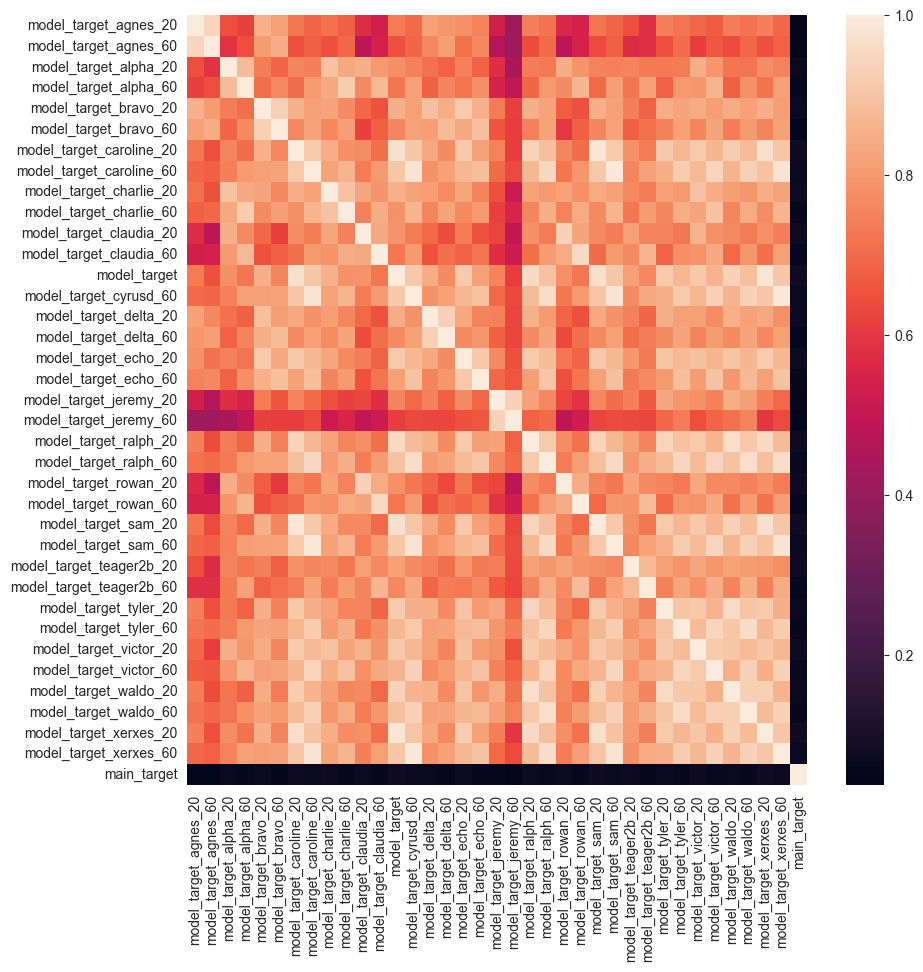

In [17]:
#correlation matrix heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df_main.corr(), annot=False)

(array([1.17000e+02, 4.37100e+03, 4.32840e+04, 1.52070e+05, 2.42573e+05,
        1.76725e+05, 5.91300e+04, 9.15100e+03, 7.41000e+02, 2.20000e+01]),
 array([0.45367007, 0.46375421, 0.47383836, 0.48392251, 0.49400666,
        0.50409081, 0.51417496, 0.5242591 , 0.53434325, 0.5444274 ,
        0.55451155]),
 <BarContainer object of 10 artists>)

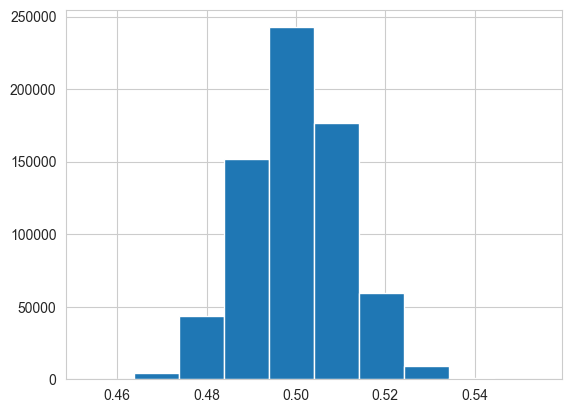

In [18]:
#histogram of main target
plt.hist(predictions_train['model_target_agnes_20'])


(array([ 33996.,      0., 138070.,      0.,      0., 344112.,      0.,
        137929.,      0.,  34077.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

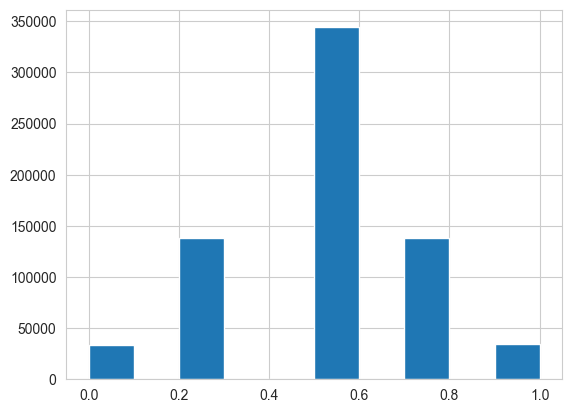

In [19]:
plt.hist(y_train_main_target)

(array([1.17000e+02, 4.37100e+03, 4.32840e+04, 1.52070e+05, 2.42573e+05,
        1.76725e+05, 5.91300e+04, 9.15100e+03, 7.41000e+02, 2.20000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

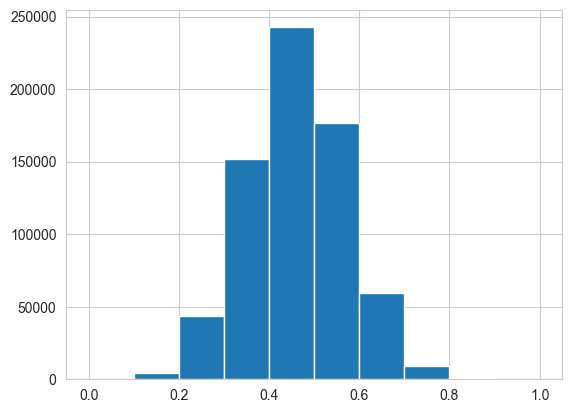

In [20]:
#minmax scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_pred=scaler.fit_transform(predictions_train['model_target_agnes_20'].values.reshape(-1,1))

plt.hist(scaled_pred)

In [21]:
min(scaled_pred), max(scaled_pred)

(array([0.]), array([1.]))

In [22]:
predictions

,model_target_agnes_20,model_target_agnes_60,model_target_alpha_20,model_target_alpha_60,model_target_bravo_20,model_target_bravo_60,model_target_caroline_20,model_target_caroline_60,model_target_charlie_20,model_target_charlie_60,...,model_target_teager2b_20,model_target_teager2b_60,model_target_tyler_20,model_target_tyler_60,model_target_victor_20,model_target_victor_60,model_target_waldo_20,model_target_waldo_60,model_target_xerxes_20,model_target_xerxes_60
0,0.487895,0.490512,0.494008,0.497398,0.486867,0.489858,0.487869,0.493054,0.492884,0.499746,...,0.494118,0.494118,0.488531,0.493525,0.488738,0.494145,0.490861,0.494342,0.489671,0.494633
1,0.507255,0.510912,0.501719,0.503009,0.508261,0.516859,0.499162,0.502523,0.503574,0.504264,...,0.504674,0.507364,0.501236,0.504689,0.502293,0.503082,0.501742,0.502089,0.500130,0.502540
2,0.486158,0.485640,0.501899,0.498721,0.495044,0.495835,0.500243,0.495266,0.498836,0.500184,...,0.499772,0.496431,0.496435,0.500612,0.502258,0.500922,0.497073,0.497574,0.498899,0.495525
3,0.512101,0.519444,0.512201,0.512194,0.514491,0.519862,0.514119,0.517307,0.512171,0.513346,...,0.502661,0.500275,0.514032,0.517377,0.517990,0.522126,0.515918,0.520649,0.510793,0.515675
4,0.524481,0.533430,0.504567,0.504748,0.512469,0.520614,0.506757,0.513296,0.503943,0.507971,...,0.505932,0.509380,0.514238,0.517452,0.504131,0.511063,0.511033,0.519095,0.508833,0.512609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883779,0.495854,0.494388,0.497026,0.496878,0.492956,0.488774,0.494649,0.495721,0.498915,0.496690,...,0.500768,0.505733,0.502641,0.501419,0.496535,0.499603,0.498468,0.500396,0.496797,0.496543
883780,0.497733,0.486766,0.497490,0.496036,0.494498,0.484032,0.499378,0.494464,0.501345,0.496529,...,0.496880,0.492979,0.495074,0.487324,0.497921,0.493368,0.495988,0.490829,0.501405,0.496495
883781,0.495618,0.496152,0.490599,0.487516,0.486735,0.482265,0.491128,0.486657,0.490611,0.488599,...,0.491220,0.486522,0.487421,0.483673,0.487875,0.481132,0.487969,0.482213,0.491018,0.488763
883782,0.483801,0.486760,0.493995,0.495211,0.492915,0.495395,0.491177,0.493814,0.493243,0.498159,...,0.494224,0.491603,0.489969,0.488221,0.488877,0.488735,0.490937,0.492043,0.493206,0.491987


In [23]:
models

{'model_target_agnes_20': LGBMRegressor(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
               n_estimators=2000, n_jobs=-1, num_leaves=15),
 'model_target_agnes_60': LGBMRegressor(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
               n_estimators=2000, n_jobs=-1, num_leaves=15),
 'model_target_alpha_20': LGBMRegressor(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
               n_estimators=2000, n_jobs=-1, num_leaves=15),
 'model_target_alpha_60': LGBMRegressor(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
               n_estimators=2000, n_jobs=-1, num_leaves=15),
 'model_target_bravo_20': LGBMRegressor(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
               n_estimators=2000, n_jobs=-1, num_leaves=15),
 'model_target_bravo_60': LGBMRegressor(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
               n_estimators=2000, n_jobs=-1, num_leaves=15),
 'model_target_caroline_20': LGBMRegressor(colsample_bytree=0.1,

In [24]:
validation['era']

id
n000101811a8a843    0575
n001e1318d5072ac    0575
n002a9c5ab785cbb    0575
n002ccf6d0e8c5ad    0575
n0041544c345c91d    0575
                    ... 
nffef5148b95d67a    1143
nffef7c5973c9171    1143
nfff634a1a813cd3    1143
nfff6939e1056f1c    1143
nfff6ef67219c7af    1143
Name: era, Length: 883784, dtype: object

In [25]:
predictions_train.columns

Index(['model_target_agnes_20', 'model_target_agnes_60',
       'model_target_alpha_20', 'model_target_alpha_60',
       'model_target_bravo_20', 'model_target_bravo_60',
       'model_target_caroline_20', 'model_target_caroline_60',
       'model_target_charlie_20', 'model_target_charlie_60',
       'model_target_claudia_20', 'model_target_claudia_60', 'model_target',
       'model_target_cyrusd_60', 'model_target_delta_20',
       'model_target_delta_60', 'model_target_echo_20', 'model_target_echo_60',
       'model_target_jeremy_20', 'model_target_jeremy_60',
       'model_target_ralph_20', 'model_target_ralph_60',
       'model_target_rowan_20', 'model_target_rowan_60', 'model_target_sam_20',
       'model_target_sam_60', 'model_target_teager2b_20',
       'model_target_teager2b_60', 'model_target_tyler_20',
       'model_target_tyler_60', 'model_target_victor_20',
       'model_target_victor_60', 'model_target_waldo_20',
       'model_target_waldo_60', 'model_target_xerxes_20',
  

In [26]:
predictions['era']=validation['era'].reset_index(drop=True)
predictions_train['era']=train['era'].reset_index(drop=True)

In [27]:
y_val=y_val.reset_index(drop=True)
y_val

,target
0,0.75
1,0.00
2,0.50
3,0.00
4,0.50
...,...
883779,0.50
883780,0.50
883781,0.50
883782,0.50


In [28]:
predictions.head()

,model_target_agnes_20,model_target_agnes_60,model_target_alpha_20,model_target_alpha_60,model_target_bravo_20,model_target_bravo_60,model_target_caroline_20,model_target_caroline_60,model_target_charlie_20,model_target_charlie_60,...,model_target_teager2b_60,model_target_tyler_20,model_target_tyler_60,model_target_victor_20,model_target_victor_60,model_target_waldo_20,model_target_waldo_60,model_target_xerxes_20,model_target_xerxes_60,era
0,0.487895,0.490512,0.494008,0.497398,0.486867,0.489858,0.487869,0.493054,0.492884,0.499746,...,0.494118,0.488531,0.493525,0.488738,0.494145,0.490861,0.494342,0.489671,0.494633,0575
1,0.507255,0.510912,0.501719,0.503009,0.508261,0.516859,0.499162,0.502523,0.503574,0.504264,...,0.507364,0.501236,0.504689,0.502293,0.503082,0.501742,0.502089,0.500130,0.502540,0575
2,0.486158,0.485640,0.501899,0.498721,0.495044,0.495835,0.500243,0.495266,0.498836,0.500184,...,0.496431,0.496435,0.500612,0.502258,0.500922,0.497073,0.497574,0.498899,0.495525,0575
3,0.512101,0.519444,0.512201,0.512194,0.514491,0.519862,0.514119,0.517307,0.512171,0.513346,...,0.500275,0.514032,0.517377,0.517990,0.522126,0.515918,0.520649,0.510793,0.515675,0575
4,0.524481,0.533430,0.504567,0.504748,0.512469,0.520614,0.506757,0.513296,0.503943,0.507971,...,0.509380,0.514238,0.517452,0.504131,0.511063,0.511033,0.519095,0.508833,0.512609,0575


In [29]:
from numerai_automl.target_ensembler import TargetEnsembler

target_ensembler = TargetEnsembler(models=models,predictions=predictions,predictions_train=predictions_train ,main_target="target", number_of_interations=30)


In [30]:
print(predictions)

        model_target_agnes_20  model_target_agnes_60  model_target_alpha_20  \
0                    0.487895               0.490512               0.494008   
1                    0.507255               0.510912               0.501719   
2                    0.486158               0.485640               0.501899   
3                    0.512101               0.519444               0.512201   
4                    0.524481               0.533430               0.504567   
...                       ...                    ...                    ...   
883779               0.495854               0.494388               0.497026   
883780               0.497733               0.486766               0.497490   
883781               0.495618               0.496152               0.490599   
883782               0.483801               0.486760               0.493995   
883783               0.482760               0.475315               0.490530   

        model_target_alpha_60  model_target_bravo_2

In [31]:
y_train= pd.DataFrame(train['target']).reset_index(drop=True)
y_train

,target
0,0.25
1,0.25
2,0.75
3,0.25
4,0.25
...,...
688179,0.00
688180,0.25
688181,0.50
688182,0.25


In [32]:
dict_en=target_ensembler.ensemble(y_train, y_val, method=None)

                  mean      std   sharpe  max_drawdown
prediction_0  0.016505 0.018786 0.878581      0.036873
prediction_1  0.015096 0.017741 0.850928      0.053355
prediction_2  0.014634 0.017343 0.843809      0.051255
prediction_3  0.017564 0.019187 0.915440      0.035484
prediction_4  0.018049 0.019816 0.910830      0.036782
prediction_5  0.016230 0.018654 0.870027      0.042529
prediction_6  0.016607 0.018581 0.893769      0.042545
prediction_7  0.018585 0.019529 0.951686      0.039435
prediction_8  0.016904 0.018596 0.909008      0.040691
prediction_9  0.016307 0.018660 0.873898      0.034195
prediction_10 0.016634 0.018510 0.898696      0.039535
prediction_11 0.017627 0.019237 0.916312      0.037499
prediction_12 0.017202 0.018920 0.909207      0.036700
prediction_13 0.015096 0.017741 0.850928      0.053355
prediction_14 0.017651 0.018923 0.932769      0.039042
prediction_15 0.017356 0.019316 0.898542      0.036280
prediction_16 0.015174 0.017439 0.870163      0.037111
prediction

In [33]:
predictions.corr()

,model_target_agnes_20,model_target_agnes_60,model_target_alpha_20,model_target_alpha_60,model_target_bravo_20,model_target_bravo_60,model_target_caroline_20,model_target_caroline_60,model_target_charlie_20,model_target_charlie_60,...,model_target_teager2b_60,model_target_tyler_20,model_target_tyler_60,model_target_victor_20,model_target_victor_60,model_target_waldo_20,model_target_waldo_60,model_target_xerxes_20,model_target_xerxes_60,era
model_target_agnes_20,1.000000,0.944697,0.648669,0.631071,0.855975,0.815911,0.732180,0.702529,0.720784,0.691246,...,0.590092,0.742953,0.726091,0.700890,0.686115,0.734798,0.721151,0.747442,0.708230,-0.005724
model_target_agnes_60,0.944697,1.000000,0.585776,0.650399,0.809216,0.848255,0.650118,0.689365,0.658223,0.705485,...,0.590386,0.651591,0.710973,0.622129,0.677804,0.642391,0.701361,0.654430,0.697039,-0.010337
model_target_alpha_20,0.648669,0.585776,1.000000,0.885560,0.752925,0.698172,0.772162,0.755664,0.899649,0.837724,...,0.741897,0.749540,0.746840,0.858559,0.804068,0.742055,0.731565,0.789725,0.759838,-0.004542
model_target_alpha_60,0.631071,0.650399,0.885560,1.000000,0.728702,0.777681,0.723936,0.823722,0.847383,0.926897,...,0.826406,0.705042,0.815922,0.806795,0.875841,0.701624,0.796058,0.736016,0.831297,-0.007856
model_target_bravo_20,0.855975,0.809216,0.752925,0.728702,1.000000,0.933609,0.858399,0.825948,0.830588,0.781644,...,0.696612,0.857253,0.836832,0.850999,0.828013,0.849923,0.825593,0.859136,0.819654,-0.006210
model_target_bravo_60,0.815911,0.848255,0.698172,0.777681,0.933609,1.000000,0.768306,0.833748,0.768442,0.821592,...,0.722269,0.760096,0.831475,0.770271,0.842105,0.750937,0.815111,0.762660,0.828515,-0.008820
model_target_caroline_20,0.732180,0.650118,0.772162,0.723936,0.858399,0.768306,1.000000,0.914971,0.850804,0.780432,...,0.749088,0.911195,0.872008,0.919132,0.868426,0.924578,0.882255,0.968538,0.903851,-0.007883
model_target_caroline_60,0.702529,0.689365,0.755664,0.823722,0.825948,0.833748,0.914971,1.000000,0.825377,0.870273,...,0.831163,0.855473,0.922938,0.878485,0.944747,0.864258,0.936999,0.897300,0.978025,-0.012105
model_target_charlie_20,0.720784,0.658223,0.899649,0.847383,0.830588,0.768442,0.850804,0.825377,1.000000,0.899757,...,0.748711,0.827206,0.812288,0.902009,0.850180,0.814585,0.799814,0.852418,0.825523,-0.008519
model_target_charlie_60,0.691246,0.705485,0.837724,0.926897,0.781644,0.821592,0.780432,0.870273,0.899757,1.000000,...,0.816031,0.767895,0.858320,0.834439,0.903581,0.765051,0.848913,0.780350,0.868518,-0.011671


In [34]:
#pocz wariancję dla kolumn wszystkich w df predictions
predictions.describe()

,model_target_agnes_20,model_target_agnes_60,model_target_alpha_20,model_target_alpha_60,model_target_bravo_20,model_target_bravo_60,model_target_caroline_20,model_target_caroline_60,model_target_charlie_20,model_target_charlie_60,...,model_target_teager2b_20,model_target_teager2b_60,model_target_tyler_20,model_target_tyler_60,model_target_victor_20,model_target_victor_60,model_target_waldo_20,model_target_waldo_60,model_target_xerxes_20,model_target_xerxes_60
count,883784.000000,883784.000000,883784.000000,883784.000000,883784.000000,883784.000000,883784.000000,883784.000000,883784.000000,883784.000000,...,883784.000000,883784.000000,883784.000000,883784.000000,883784.000000,883784.000000,883784.000000,883784.000000,883784.000000,883784.000000
mean,0.500420,0.500547,0.500095,0.500121,0.500218,0.500138,0.500041,0.499847,0.500201,0.500232,...,0.499981,0.499891,0.500012,0.500010,0.500053,0.499904,0.500033,0.499981,0.500035,0.499897
std,0.011035,0.016061,0.005822,0.008078,0.008979,0.012777,0.007144,0.009520,0.006156,0.008758,...,0.005252,0.007292,0.007784,0.010381,0.007376,0.010342,0.008468,0.010828,0.007116,0.009350
min,0.452063,0.425921,0.473758,0.461477,0.458742,0.438616,0.469347,0.455348,0.473518,0.460510,...,0.473806,0.460971,0.467819,0.451163,0.467935,0.454750,0.464197,0.451148,0.468399,0.455347
25%,0.492860,0.489778,0.496143,0.494737,0.494157,0.491614,0.495147,0.493431,0.496052,0.494417,...,0.496513,0.495173,0.494632,0.492865,0.495010,0.492925,0.494179,0.492524,0.495107,0.493556
50%,0.500488,0.500961,0.499791,0.499920,0.500139,0.500268,0.499769,0.499729,0.499925,0.500158,...,0.499929,0.500023,0.499833,0.499902,0.499640,0.499715,0.499798,0.499876,0.499707,0.499734
75%,0.507956,0.511639,0.503742,0.505294,0.506217,0.508829,0.504633,0.506121,0.504086,0.505969,...,0.503389,0.504723,0.505178,0.507003,0.504643,0.506664,0.505621,0.507303,0.504613,0.506079
max,0.552373,0.564611,0.533571,0.543243,0.543834,0.557411,0.537608,0.546074,0.535573,0.543536,...,0.529582,0.533253,0.543684,0.547980,0.544223,0.548707,0.543894,0.548540,0.537973,0.547427


In [35]:
print(dict_en)

{'average': Ensemble: average with models: dict_keys(['model_target_xerxes_20', 'model_target_caroline_60']), 'weighted_average': Ensemble: weighted_average with models: dict_keys(['model_target_xerxes_20', 'model_target_charlie_20', 'model_target_victor_20', 'model_target_xerxes_60']) and weights: [0.07294374679118182, 0.2330964209412454, 0.2679588687202593, 0.4260009635473135], 'lightgbm': Ensemble: lightgbm with models: dict_keys(['model_target_agnes_20', 'model_target_agnes_60', 'model_target_alpha_20', 'model_target_alpha_60', 'model_target_bravo_20', 'model_target_bravo_60', 'model_target_caroline_20', 'model_target_caroline_60', 'model_target_charlie_20', 'model_target_charlie_60', 'model_target_claudia_20', 'model_target_claudia_60', 'model_target', 'model_target_cyrusd_60', 'model_target_delta_20', 'model_target_delta_60', 'model_target_echo_20', 'model_target_echo_60', 'model_target_jeremy_20', 'model_target_jeremy_60', 'model_target_ralph_20', 'model_target_ralph_60', 'model

In [36]:
#random list of weights len(predictions.columns)-1 that sum to 1
import numpy as np
weights = np.random.rand(len(predictions.columns)-1)
weights = weights/weights.sum()
print(weights)

[0.02239543 0.05684746 0.04376919 0.03579647 0.00932905 0.00932761
 0.00347308 0.05179255 0.03594336 0.04233883 0.00123084 0.05799525
 0.04977547 0.01269671 0.01087213 0.01096658 0.018192   0.03137753
 0.02582792 0.01741389 0.03658542 0.00834096 0.01746864 0.02190641
 0.02727046 0.04694918 0.01193939 0.03074838 0.03542312 0.00277748
 0.03632782 0.0101964  0.00388973 0.05673811 0.05773946 0.04833769]


In [37]:
predictions

,model_target_agnes_20,model_target_agnes_60,model_target_alpha_20,model_target_alpha_60,model_target_bravo_20,model_target_bravo_60,model_target_caroline_20,model_target_caroline_60,model_target_charlie_20,model_target_charlie_60,...,model_target_teager2b_60,model_target_tyler_20,model_target_tyler_60,model_target_victor_20,model_target_victor_60,model_target_waldo_20,model_target_waldo_60,model_target_xerxes_20,model_target_xerxes_60,era
0,0.487895,0.490512,0.494008,0.497398,0.486867,0.489858,0.487869,0.493054,0.492884,0.499746,...,0.494118,0.488531,0.493525,0.488738,0.494145,0.490861,0.494342,0.489671,0.494633,0575
1,0.507255,0.510912,0.501719,0.503009,0.508261,0.516859,0.499162,0.502523,0.503574,0.504264,...,0.507364,0.501236,0.504689,0.502293,0.503082,0.501742,0.502089,0.500130,0.502540,0575
2,0.486158,0.485640,0.501899,0.498721,0.495044,0.495835,0.500243,0.495266,0.498836,0.500184,...,0.496431,0.496435,0.500612,0.502258,0.500922,0.497073,0.497574,0.498899,0.495525,0575
3,0.512101,0.519444,0.512201,0.512194,0.514491,0.519862,0.514119,0.517307,0.512171,0.513346,...,0.500275,0.514032,0.517377,0.517990,0.522126,0.515918,0.520649,0.510793,0.515675,0575
4,0.524481,0.533430,0.504567,0.504748,0.512469,0.520614,0.506757,0.513296,0.503943,0.507971,...,0.509380,0.514238,0.517452,0.504131,0.511063,0.511033,0.519095,0.508833,0.512609,0575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883779,0.495854,0.494388,0.497026,0.496878,0.492956,0.488774,0.494649,0.495721,0.498915,0.496690,...,0.505733,0.502641,0.501419,0.496535,0.499603,0.498468,0.500396,0.496797,0.496543,1143
883780,0.497733,0.486766,0.497490,0.496036,0.494498,0.484032,0.499378,0.494464,0.501345,0.496529,...,0.492979,0.495074,0.487324,0.497921,0.493368,0.495988,0.490829,0.501405,0.496495,1143
883781,0.495618,0.496152,0.490599,0.487516,0.486735,0.482265,0.491128,0.486657,0.490611,0.488599,...,0.486522,0.487421,0.483673,0.487875,0.481132,0.487969,0.482213,0.491018,0.488763,1143
883782,0.483801,0.486760,0.493995,0.495211,0.492915,0.495395,0.491177,0.493814,0.493243,0.498159,...,0.491603,0.489969,0.488221,0.488877,0.488735,0.490937,0.492043,0.493206,0.491987,1143


In [38]:
.apply(lambda x: (x * weights).sum(axis=1))

SyntaxError: invalid syntax (140424729.py, line 1)

In [ ]:
predictions.groupby("era").rank(pct=True)

In [ ]:
wtf = (predictions.groupby("era").rank(pct=True) * weights)
wtf

In [ ]:
wtf.to_numpy()[0,:].sum()

In [ ]:
wtf.sum(axis=1)

In [ ]:
(predictions.groupby("era").rank(pct=True) * weights).sum(axis=1)

In [ ]:
#sprawdz nan w ramce danych predictions

train.isnull().sum()

In [40]:
dict_en.keys()

dict_keys(['average', 'weighted_average', 'lightgbm'])

In [41]:
dict_en.values()

dict_values([Ensemble: average with models: dict_keys(['model_target_xerxes_20', 'model_target_caroline_60']), Ensemble: weighted_average with models: dict_keys(['model_target_xerxes_20', 'model_target_charlie_20', 'model_target_victor_20', 'model_target_xerxes_60']) and weights: [0.07294374679118182, 0.2330964209412454, 0.2679588687202593, 0.4260009635473135], Ensemble: lightgbm with models: dict_keys(['model_target_agnes_20', 'model_target_agnes_60', 'model_target_alpha_20', 'model_target_alpha_60', 'model_target_bravo_20', 'model_target_bravo_60', 'model_target_caroline_20', 'model_target_caroline_60', 'model_target_charlie_20', 'model_target_charlie_60', 'model_target_claudia_20', 'model_target_claudia_60', 'model_target', 'model_target_cyrusd_60', 'model_target_delta_20', 'model_target_delta_60', 'model_target_echo_20', 'model_target_echo_60', 'model_target_jeremy_20', 'model_target_jeremy_60', 'model_target_ralph_20', 'model_target_ralph_60', 'model_target_rowan_20', 'model_targe